<a href="https://colab.research.google.com/github/Ausawin2016/30Daypy/blob/master/%235_Assigment2_%E0%B8%AD%E0%B8%B1%E0%B8%A8%E0%B8%A7%E0%B8%B4%E0%B8%99_%E0%B9%80%E0%B8%AD%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%A1%E0%B8%AA%E0%B8%B0%E0%B8%AD%E0%B8%B2%E0%B8%94COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSSE COVID-19 Dataset

##เป็นข้อมูลสรุปรายงานการติดเชื้อ COVID-19 จากทั่วโลกตั้งแต่วันที่ 22 มกราคม 2020 ถึง 12 เมษายน 2020


ประกอบด้วยไฟล์

*   time_series_covid19_confirmed_global.csv
*   time_series_covid19_deaths_global.csv
*   time_series_covid19_recovered_global.csv

##Field description
* **Province/State**: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* **Country/Region**: country/region name conforming to WHO (will be updated).
* **Confirmed**: the number of confirmed cases(accumulated).
* **Deaths**: the number of deaths(accumulated).
* **Recovered**: the number of recovered cases(accumulated).

**จากไฟล์จงทำการเขียนโปรแกรมเพื่อตอบคำถามต่อไปนี้**
1.   จงแสดงอัตราการรักษาหายของเฉพาะผู้ป่วยในสหภาพยุโรปเป็นเปอร์เซ็นต์
2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)
3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)
4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด
5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร
6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets  as  widgets
from  ipywidgets import interact,interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.Timestamp.now()

Timestamp('2020-07-18 10:46:14.898151')

In [137]:
import warnings as wn
wn.filterwarnings('ignore')

#Read Data from **colab drive** 

---



In [138]:
#Solution

from google.colab import  files
files.upload()

Saving TIME_S~1.CSV to TIME_S~1.CSV


{'TIME_S~1.CSV': b'Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20\n,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607\n,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [228]:
path='/content/TIME_S~'
status = ['confirmed','deaths','recovered']
dfs = []

for s in status:
  d = pd.read_csv(f'{path}{s}.CSV')
  dfs.append(d)

dfs


[                Province/State         Country/Region  ...  4/11/20  4/12/20
 0                          NaN            Afghanistan  ...      555      607
 1                          NaN                Albania  ...      433      446
 2                          NaN                Algeria  ...     1825     1914
 3                          NaN                Andorra  ...      601      638
 4                          NaN                 Angola  ...       19       19
 ..                         ...                    ...  ...      ...      ...
 259  Saint Pierre and Miquelon                 France  ...        1        1
 260                        NaN            South Sudan  ...        4        4
 261                        NaN         Western Sahara  ...        4        6
 262                        NaN  Sao Tome and Principe  ...        4        4
 263                        NaN                  Yemen  ...        1        1
 
 [264 rows x 86 columns],
                 Province/State     

In [229]:
#appednd data สร้าง cloumn(key) status และรวม 3 datafram เข้ากัน
df = pd.concat(dfs, keys=status)
df

Province/State  ... 4/12/20
confirmed 0                          NaN  ...     607
          1                          NaN  ...     446
          2                          NaN  ...    1914
          3                          NaN  ...     638
          4                          NaN  ...      19
...                                  ...  ...     ...
recovered 245  Saint Pierre and Miquelon  ...       0
          246                        NaN  ...       0
          247                        NaN  ...       0
          248                        NaN  ...       0
          249                        NaN  ...       0

[778 rows x 86 columns]

In [230]:
df.loc['confirmed']


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4


In [231]:
pd.melt(df.loc['confirmed'],
                       id_vars=['Province/State','Country/Region','Lat','Long'],
                       var_name='Date', value_name='confirmed')

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
21643,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/12/20,1
21644,NaN,South Sudan,6.877000,31.307000,4/12/20,4
21645,NaN,Western Sahara,24.215500,-12.885800,4/12/20,6
21646,NaN,Sao Tome and Principe,0.186360,6.613081,4/12/20,4


In [232]:
#Upivot/melt Data แปลง datafram จาก wide format เป็น long format เพื่อนำมาทำ grahp

dtmps = []
for k in status:
  dtmps.append(pd.melt(df.loc[k],
                       id_vars=['Province/State','Country/Region','Lat','Long'],
                       var_name='Date', value_name=k))

In [144]:
dtmps

[                  Province/State         Country/Region  ...     Date  confirmed
 0                            NaN            Afghanistan  ...  1/22/20          0
 1                            NaN                Albania  ...  1/22/20          0
 2                            NaN                Algeria  ...  1/22/20          0
 3                            NaN                Andorra  ...  1/22/20          0
 4                            NaN                 Angola  ...  1/22/20          0
 ...                          ...                    ...  ...      ...        ...
 21643  Saint Pierre and Miquelon                 France  ...  4/12/20          1
 21644                        NaN            South Sudan  ...  4/12/20          4
 21645                        NaN         Western Sahara  ...  4/12/20          6
 21646                        NaN  Sao Tome and Principe  ...  4/12/20          4
 21647                        NaN                  Yemen  ...  4/12/20          1
 
 [21648 rows x

In [233]:
#concat เป็นการเติม colum เข้าไป
dcovid = pd.concat(dtmps, axis=1)
dcovid
#ต้องทำการ remove duplicate column ออกด้วย



,Province/State,Country/Region,Lat,Long,Date,confirmed,Province/State,Country/Region,Lat,Long,Date,deaths,Province/State,Country/Region,Lat,Long,Date,recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,NaN,Albania,41.153300,20.168300,1/22/20,0,NaN,Albania,41.1533,20.1683,1/22/20,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,NaN,Algeria,28.033900,1.659600,1/22/20,0,NaN,Algeria,28.0339,1.6596,1/22/20,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,NaN,Andorra,42.506300,1.521800,1/22/20,0,NaN,Andorra,42.5063,1.5218,1/22/20,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,NaN,Angola,-11.202700,17.873900,1/22/20,0,NaN,Angola,-11.2027,17.8739,1/22/20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21643,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/12/20,1,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/12/20,0,NaN,NaN,NaN,NaN,NaN,NaN
21644,NaN,South Sudan,6.877000,31.307000,4/12/20,4,NaN,South Sudan,6.877000,31.307000,4/12/20,0,NaN,NaN,NaN,NaN,NaN,NaN
21645,NaN,Western Sahara,24.215500,-12.885800,4/12/20,6,NaN,Western Sahara,24.215500,-12.885800,4/12/20,0,NaN,NaN,NaN,NaN,NaN,NaN
21646,NaN,Sao Tome and Principe,0.186360,6.613081,4/12/20,4,NaN,Sao Tome and Principe,0.186360,6.613081,4/12/20,0,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
#remove duplicate column
dcovid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'confirmed',
       'Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'deaths',
       'Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'recovered'],
      dtype='object')

In [147]:
dcovid.columns.duplicated()

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False])

In [235]:
dcovid = dcovid.loc[:, ~dcovid.columns.duplicated()]
dcovid

,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
21643,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/12/20,1,0,NaN
21644,NaN,South Sudan,6.877000,31.307000,4/12/20,4,0,NaN
21645,NaN,Western Sahara,24.215500,-12.885800,4/12/20,6,0,NaN
21646,NaN,Sao Tome and Principe,0.186360,6.613081,4/12/20,4,0,NaN


In [236]:
dcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21648 entries, 0 to 21647
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6724 non-null   object 
 1   Country/Region  21648 non-null  object 
 2   Lat             21648 non-null  float64
 3   Long            21648 non-null  float64
 4   Date            21648 non-null  object 
 5   confirmed       21648 non-null  int64  
 6   deaths          21648 non-null  int64  
 7   recovered       20500 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.3+ MB


In [150]:
#แปลงวันที่ convert date data type
#dcovid['Date']=pd.to_datetime(dcovid['Date'])
#dcovid.info()
#dcovid.head()

In [151]:
#จัดเรียง datafram ใหม่
dcovid = dcovid.sort_values(['Country/Region','Province/State','Date']).reset_index(drop=True)
dcovid

,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered
0,NaN,Afghanistan,33.0,65.0,1/22/20,0,0,0.0
1,NaN,Afghanistan,33.0,65.0,1/23/20,0,0,0.0
2,NaN,Afghanistan,33.0,65.0,1/24/20,0,0,0.0
3,NaN,Afghanistan,33.0,65.0,1/25/20,0,0,0.0
4,NaN,Afghanistan,33.0,65.0,1/26/20,0,0,1.0
...,...,...,...,...,...,...,...,...
21643,NaN,Zimbabwe,-20.0,30.0,4/5/20,9,1,6064.0
21644,NaN,Zimbabwe,-20.0,30.0,4/6/20,10,1,104.0
21645,NaN,Zimbabwe,-20.0,30.0,4/7/20,11,2,135.0
21646,NaN,Zimbabwe,-20.0,30.0,4/8/20,11,3,NaN


In [152]:
dcovid[dcovid['Country/Region']=='Thailand']

,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered
19188,NaN,Thailand,15.0,101.0,1/22/20,2,0,0.0
19189,NaN,Thailand,15.0,101.0,1/23/20,3,0,0.0
19190,NaN,Thailand,15.0,101.0,1/24/20,5,0,0.0
19191,NaN,Thailand,15.0,101.0,1/25/20,7,0,0.0
19192,NaN,Thailand,15.0,101.0,1/26/20,8,0,0.0
...,...,...,...,...,...,...,...,...
19265,NaN,Thailand,15.0,101.0,4/5/20,2169,23,0.0
19266,NaN,Thailand,15.0,101.0,4/6/20,2220,26,4.0
19267,NaN,Thailand,15.0,101.0,4/7/20,2258,27,6463.0
19268,NaN,Thailand,15.0,101.0,4/8/20,2369,30,NaN


In [153]:
#Aggrete by country/Region สร้าง datafram ที่ดูระดับประเทศ
dcountry = dcovid.groupby(['Country/Region','Date']).sum()[['confirmed','deaths','recovered']]
dcountry

confirmed  deaths  recovered
Country/Region Date                                 
Afghanistan    1/22/20          0       0        0.0
               1/23/20          0       0        0.0
               1/24/20          0       0        0.0
               1/25/20          0       0        0.0
               1/26/20          0       0        1.0
...                           ...     ...        ...
Zimbabwe       4/5/20           9       1     6064.0
               4/6/20          10       1      104.0
               4/7/20          11       2      135.0
               4/8/20          11       3        0.0
               4/9/20          11       3        0.0

[15170 rows x 3 columns]

In [154]:
dcountry.index

MultiIndex([('Afghanistan', '1/22/20'),
            ('Afghanistan', '1/23/20'),
            ('Afghanistan', '1/24/20'),
            ('Afghanistan', '1/25/20'),
            ('Afghanistan', '1/26/20'),
            ('Afghanistan', '1/27/20'),
            ('Afghanistan', '1/28/20'),
            ('Afghanistan', '1/29/20'),
            ('Afghanistan', '1/30/20'),
            ('Afghanistan', '1/31/20'),
            ...
            (   'Zimbabwe', '4/11/20'),
            (   'Zimbabwe', '4/12/20'),
            (   'Zimbabwe',  '4/2/20'),
            (   'Zimbabwe',  '4/3/20'),
            (   'Zimbabwe',  '4/4/20'),
            (   'Zimbabwe',  '4/5/20'),
            (   'Zimbabwe',  '4/6/20'),
            (   'Zimbabwe',  '4/7/20'),
            (   'Zimbabwe',  '4/8/20'),
            (   'Zimbabwe',  '4/9/20')],
           names=['Country/Region', 'Date'], length=15170)


##1.   จงแสดงอัตราการรักษาหายของเฉพาะผู้ป่วยในสหภาพยุโรปเป็นเปอร์เซ็นต์

In [155]:
pip install pycountry_convert

In [156]:
import pandas as pd

import pycountry_convert as pc

def country_to_continent(country_name):
 try:
   country_alpha2 = pc.country_name_to_country_alpha2(country_name)
   country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
   country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
   return country_continent_name
 except:
   return 'others'

dcovid_country = dcovid['Country/Region'].to_list()
dcovid_country

continent=[]

for countryName in dcovid_country:
  continent.append(country_to_continent(countryName))

d_con = {'Country/Region': dcovid_country,'Continent':continent}
df_con = pd.DataFrame(d_con)
df_con.head(10)


,Country/Region,Continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
5,Afghanistan,Asia
6,Afghanistan,Asia
7,Afghanistan,Asia
8,Afghanistan,Asia
9,Afghanistan,Asia


In [157]:
globalCovid = dcovid.merge(df_con, left_index= True, right_index=True)
globalCovid = globalCovid.drop(columns=['Country/Region_y'])
globalCovid
globalCovid.rename(columns={'Country/Region_x':'Country/Region'},inplace=True)
globalCovid

,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered,Continent
0,NaN,Afghanistan,33.0,65.0,1/22/20,0,0,0.0,Asia
1,NaN,Afghanistan,33.0,65.0,1/23/20,0,0,0.0,Asia
2,NaN,Afghanistan,33.0,65.0,1/24/20,0,0,0.0,Asia
3,NaN,Afghanistan,33.0,65.0,1/25/20,0,0,0.0,Asia
4,NaN,Afghanistan,33.0,65.0,1/26/20,0,0,1.0,Asia
...,...,...,...,...,...,...,...,...,...
21643,NaN,Zimbabwe,-20.0,30.0,4/5/20,9,1,6064.0,Africa
21644,NaN,Zimbabwe,-20.0,30.0,4/6/20,10,1,104.0,Africa
21645,NaN,Zimbabwe,-20.0,30.0,4/7/20,11,2,135.0,Africa
21646,NaN,Zimbabwe,-20.0,30.0,4/8/20,11,3,NaN,Africa


In [158]:

#EU_covid
eu = globalCovid[globalCovid['Continent']=='Europe']
eu_c = eu.confirmed.mean()
eu_r = eu.recovered.mean()
 
print(eu_r/eu_c*100)

print('Eu_Rate = %.2f' %(eu_r/eu_c*100),"%")# .2f = กำหนดทศนิยม 2 ตำแหน่ง




13.457475162313528
Eu_Rate = 13.46 %


2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)

     Country/Region         Lat         Long  confirmed  deaths  recovered
171              US   3041.3964   -7848.4578    5697624  169741     5791.0
36            China  88833.6094  302122.4154    5179408  185793   971343.0
84            Italy   3526.0000     984.0000    2817704  317343    28726.0
156           Spain   3280.0000    -328.0000    2404083  217621    48425.0
65          Germany   4182.0000     738.0000    1856245   27513     7086.0
61           France   7491.7168    4896.9744    1610409  136839   207943.0
80             Iran   2624.0000    4346.0000    1256579   79693    44210.0
175  United Kingdom  22142.4518  -39599.8254     834640   83434   189104.0
170          Turkey   3195.0234    2889.9506     465500    9508    69416.0
161     Switzerland   3839.0924     674.6550     419257   12135     3148.0


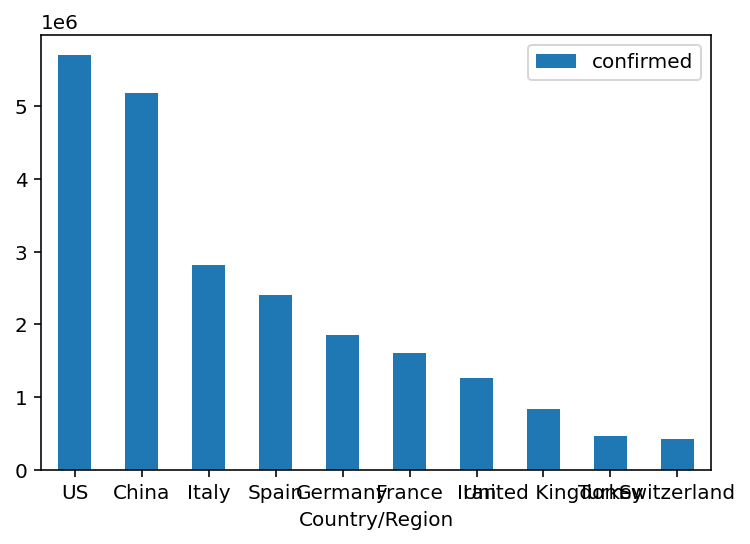

In [184]:

#global_covid
top_confirmed = globalCovid.groupby(['Country/Region']).sum().reset_index()
top_confirmed.sort_values('confirmed',ascending=False,inplace=True)
top_confirmed

print(top_confirmed.head(10))

top_confirmed.head(10).plot.bar(x='Country/Region', y='confirmed', rot=0 )



##3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)

In [224]:
#Solution
dcovid[dcovid['Country/Region']=='Thailand']


,Province/State,Country/Region,Lat,Long,Date,confirmed,deaths,recovered
19188,NaN,Thailand,15.0,101.0,1/22/20,2,0,0.0
19189,NaN,Thailand,15.0,101.0,1/23/20,3,0,0.0
19190,NaN,Thailand,15.0,101.0,1/24/20,5,0,0.0
19191,NaN,Thailand,15.0,101.0,1/25/20,7,0,0.0
19192,NaN,Thailand,15.0,101.0,1/26/20,8,0,0.0
...,...,...,...,...,...,...,...,...
19265,NaN,Thailand,15.0,101.0,4/5/20,2169,23,0.0
19266,NaN,Thailand,15.0,101.0,4/6/20,2220,26,4.0
19267,NaN,Thailand,15.0,101.0,4/7/20,2258,27,6463.0
19268,NaN,Thailand,15.0,101.0,4/8/20,2369,30,NaN


In [225]:
dcountry = dcovid.groupby(['Country/Region','Date']).sum()[['confirmed','deaths','recovered']]
dcountry.loc['Thailand']

,confirmed,deaths,recovered
Date,,,
1/22/20,2,0,0.0
1/23/20,3,0,0.0
1/24/20,5,0,0.0
1/25/20,7,0,0.0
1/26/20,8,0,0.0
...,...,...,...
4/5/20,2169,23,0.0
4/6/20,2220,26,4.0
4/7/20,2258,27,6463.0


In [ ]:
dcountry.info()


In [219]:
dcountry['weekly_patient']=dcountry.groupby(['Country/Region'])['confirmed'].diff()
dcountry['weekly_patient']=dcountry.groupby(['Country/Region'])['confirmed'].pct_change()

In [ ]:
dcountry.log['Thaialnd']

##4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด

In [161]:
#Solution

##5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร


In [246]:
#Solution
df_deaths=globalCovid.groupby(['Country/Region','Continent'])['deaths'].sum().reset_index()
df_deaths.sort_values('deaths',ascending=False,inplace=True)

dfdeaths_continent=df_deaths.head(20).groupby(['Continent'])['deaths'].sum().reset_index()
dfdeaths_continent.sort_values('deaths',ascending=False,inplace=True)
print(dfdeaths_continent)

       Continent  deaths
1         Europe  868169
0           Asia  278836
4         others  174713
3  South America   12227
2  North America    5017


##6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State

In [163]:
#Solution